<a href="https://colab.research.google.com/github/Leoparh/TP-ML/blob/main/Exercice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd '/content/drive/MyDrive/teste7/train'

/content/drive/MyDrive/teste7/train


#MobilNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/teste7/train',
        target_size=(224, 224),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/teste7/test',
        target_size=(224, 224),
        batch_size=16,
        shuffle=False)

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=test_generator, epochs=7)


In [34]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

# Get the true labels and predicted labels for the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


9/9 [==============================] - 7s 681ms/step
Confusion Matrix:
[[67  3]
 [ 2 68]]


In [35]:
#Classification report

from sklearn.metrics import classification_report
import numpy as np

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))


9/9 [==============================] - 8s 957ms/step
Classification Report
              precision    recall  f1-score   support

        cats       0.97      0.96      0.96        70
        dogs       0.96      0.97      0.96        70

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



9/9 [==============================] - 6s 680ms/step


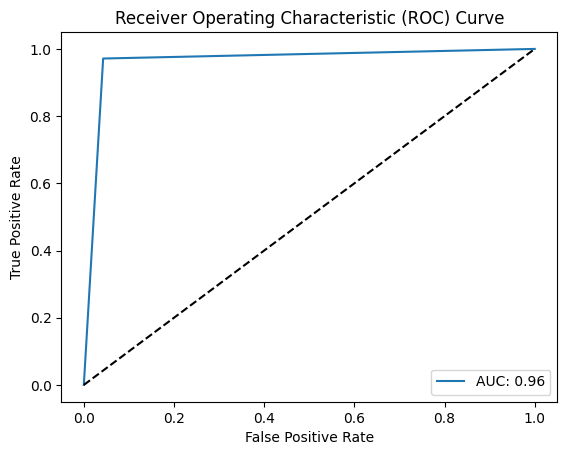

In [36]:
#ROC SCORE

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

fpr, tpr, thresholds = roc_curve(test_generator.classes, y_pred)
auc_score = roc_auc_score(test_generator.classes, y_pred)

plt.plot(fpr, tpr, label=f'AUC: {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


9/9 [==============================] - 7s 692ms/step


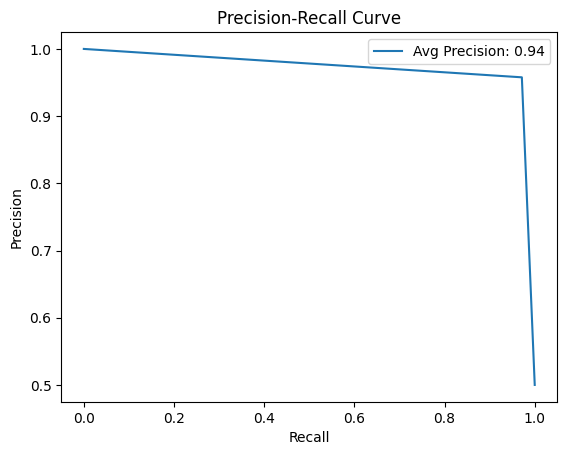

In [37]:
#Precision recall 

from sklearn.metrics import precision_recall_curve, average_precision_score

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

precision, recall, thresholds = precision_recall_curve(test_generator.classes, y_pred)
avg_precision = average_precision_score(test_generator.classes, y_pred)

plt.plot(recall, precision, label=f'Avg Precision: {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


#EfficientNetV2L

In [ ]:
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define the model architecture
base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=3,
    verbose=1
)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Get predictions on test data
y_pred = np.argmax(model.predict(test_generator), axis=-1)
y_true = test_generator.classes

# Print classification report and confusion matrix
target_names = ['Cat', 'Dog']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))


473176280/473176280 [==============================] - 3s 0us/step


Epoch 1/3
35/35 [==============================] - 575s 15s/step - loss: 0.6839 - accuracy: 0.5763 - val_loss: 0.6487 - val_accuracy: 0.6143
Epoch 2/3
35/35 [==============================] - ETA: 0s - loss: 0.6086 - accuracy: 0.6463 